<a href="https://colab.research.google.com/github/AnLiMan/Banch_size_study/blob/main/Banch_size_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение и результаты испытаний

  Нейронные сети обучаются с использованием градиентного спуска, при котором оценка ошибки, используемая для обновления весов, рассчитывается на основе подмножества обучающего набора данных. Количество примеров из набора обучающих данных, используемых для оценки градиента ошибки, называется размером пакета и является важным гиперпараметром, влияющим на динамику алгоритма обучения.

  Размер пакета (The batch size) – это гиперпараметр, определяющий количество выборок, которые необходимо обработать перед обновлением внутренних параметров модели. В конце пакета прогнозы сравниваются с ожидаемыми выходными переменными и вычисляется ошибка. Из-за этой ошибки алгоритм обновления используется для улучшения модели, например. двигаться вниз по градиенту ошибки. Набор обучающих данных можно разделить на один или несколько пакетов.

  Когда все обучающие выборки используются для создания одной партии, алгоритм обучения называется пакетным градиентным спуском (batch gradient descent). Когда партия имеет размер одной выборки, алгоритм обучения называется стохастическим градиентным спуском (stochastic gradient descent). Когда размер пакета больше одной выборки и меньше размера обучающего набора данных, алгоритм обучения называется мини-пакетным градиентным спуском (mini-batch gradient descent).

  Результаты исследования: 
  - Batch gradient descent: loss: 0.4542; accuracy: 0.8140; val_loss: 0.4465; val_accuracy: 0.8340. Время обучения: 10.6 сек
  - Stochastic gradient descent: loss: 0.4044; accuracy: 0.8300; val_loss: 0.4574; val_accuracy: 0.8240. Время обучения:  302.92 сек
  - Mini-batch gradient descent: loss: 0.3937; accuracy: 0.8220; val_loss: 0.4350; val_accuracy: 0.8180. Время обучения: 22.43 сек

# Используемые библиотеки и настройки

In [4]:
#Библиотеки
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from numpy import where
import time

#Настройки
num_of_sampeles = 1000 # Число семплов для генерации датасета
num_of_epochs = 200 # Число эпох обучения
size_of_fig = (10, 6) # Размер графиков

# Создание датасета

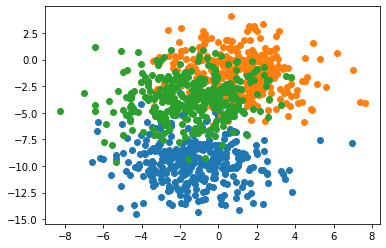

<Figure size 864x864 with 0 Axes>

In [2]:
X, y = make_blobs(n_samples=num_of_sampeles, centers=3, n_features=2, cluster_std=2, random_state=2)

# график рассеяния для значения каждого класса
for class_value in range(3):
 # select indices of points with the class label
 row_ix = where(y == class_value)
 # scatter plot for points with a different color
 plt.scatter(X[row_ix, 0], X[row_ix, 1])
# Отрисуем график
plt.figure(figsize=(12, 12))
plt.show()

# one hot encode output variable
y = to_categorical(y)
# Разделим на тренировочную (train) и тестовую (test) выборки (50/50)
n_train = int (num_of_sampeles / 2)
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# Batch gradient descent (пакетный градиентный спуск)

Epoch 1/200
1/1 [==============================] - 0s 484ms/step - loss: 9.4768 - accuracy: 0.3900 - val_loss: 5.4179 - val_accuracy: 0.4940
Epoch 2/200
1/1 [==============================] - 0s 31ms/step - loss: 5.7275 - accuracy: 0.4640 - val_loss: 1.5906 - val_accuracy: 0.4300
Epoch 3/200
1/1 [==============================] - 0s 32ms/step - loss: 1.6809 - accuracy: 0.4160 - val_loss: 3.9706 - val_accuracy: 0.3720
Epoch 4/200
1/1 [==============================] - 0s 32ms/step - loss: 4.2054 - accuracy: 0.3660 - val_loss: 4.8805 - val_accuracy: 0.3660
Epoch 5/200
1/1 [==============================] - 0s 32ms/step - loss: 5.1597 - accuracy: 0.3640 - val_loss: 4.3782 - val_accuracy: 0.3820
Epoch 6/200
1/1 [==============================] - 0s 31ms/step - loss: 4.6226 - accuracy: 0.3680 - val_loss: 2.7096 - val_accuracy: 0.4180
Epoch 7/200
1/1 [==============================] - 0s 34ms/step - loss: 2.8480 - accuracy: 0.4020 - val_loss: 2.8261 - val_accuracy: 0.4140
Epoch 8/200
1/1 [==

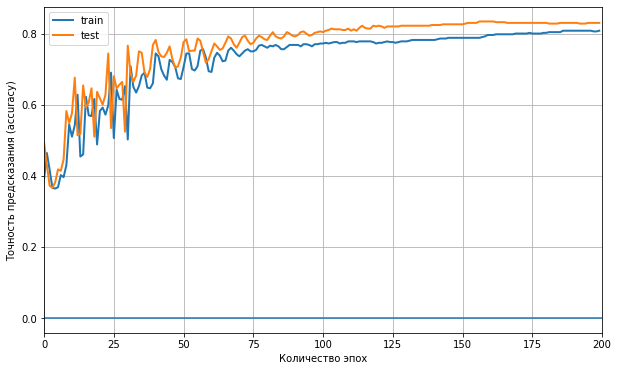

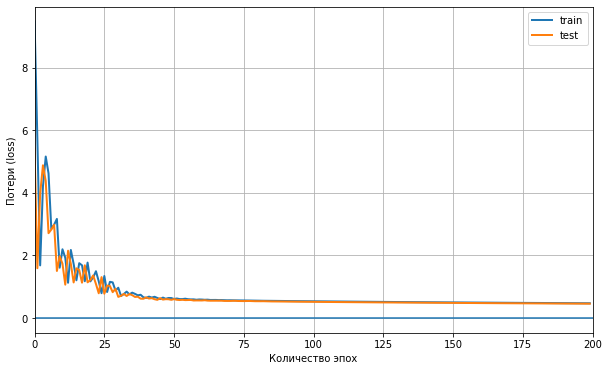

In [5]:
# Определение модели
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Подгонка (обучение) модели
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=len(trainX))
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Вывод графика результата обучения
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['accuracy'], linewidth = 2, label='train')
plt.plot(history.history['val_accuracy'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel("Точность предсказания (accuracy)")
plt.legend()
plt.show()

#Потери
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['loss'], linewidth = 2, label = 'train')  
plt.plot(history.history['val_loss'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel('Потери (loss)') 
plt.legend()
plt.show()  

# Stochastic gradient descent (стохастический градиентный спуск)

Epoch 1/200
500/500 [==============================] - 2s 3ms/step - loss: 2.2079 - accuracy: 0.5480 - val_loss: 1.7038 - val_accuracy: 0.4800
Epoch 2/200
500/500 [==============================] - 1s 3ms/step - loss: 1.1978 - accuracy: 0.6560 - val_loss: 0.7069 - val_accuracy: 0.7240
Epoch 3/200
500/500 [==============================] - 2s 4ms/step - loss: 0.7773 - accuracy: 0.6820 - val_loss: 0.5307 - val_accuracy: 0.7580
Epoch 4/200
500/500 [==============================] - 1s 3ms/step - loss: 0.6170 - accuracy: 0.7380 - val_loss: 0.5139 - val_accuracy: 0.7780
Epoch 5/200
500/500 [==============================] - 1s 2ms/step - loss: 0.5669 - accuracy: 0.7500 - val_loss: 0.5824 - val_accuracy: 0.7820
Epoch 6/200
500/500 [==============================] - 2s 4ms/step - loss: 0.5242 - accuracy: 0.7640 - val_loss: 0.5185 - val_accuracy: 0.7700
Epoch 7/200
500/500 [==============================] - 3s 6ms/step - loss: 0.5033 - accuracy: 0.7740 - val_loss: 0.4888 - val_accuracy: 0.8220

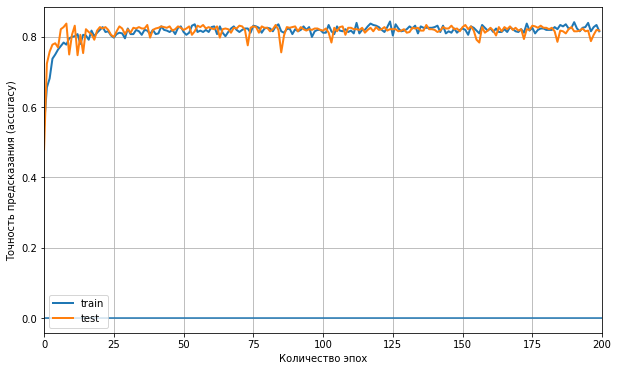

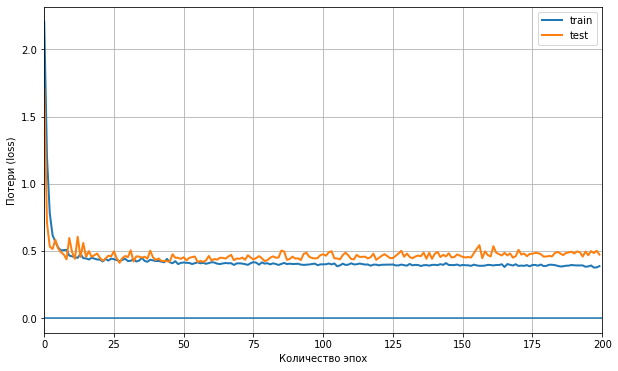

In [9]:
# Определение модели
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Подгонка (обучение) модели
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=1)
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Вывод графика результата обучения
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['accuracy'], linewidth = 2, label='train')
plt.plot(history.history['val_accuracy'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel("Точность предсказания (accuracy)")
plt.legend()
plt.show()

#Потери
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['loss'], linewidth = 2, label = 'train')  
plt.plot(history.history['val_loss'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel('Потери (loss)') 
plt.legend()
plt.show()

# Minibatch gradient descent (мини-пакетный градиентный спуск)

Epoch 1/200
16/16 [==============================] - 1s 19ms/step - loss: 1.4650 - accuracy: 0.4960 - val_loss: 1.3437 - val_accuracy: 0.6280
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 1.6109 - accuracy: 0.5740 - val_loss: 1.3846 - val_accuracy: 0.6140
Epoch 3/200
16/16 [==============================] - 0s 5ms/step - loss: 0.9657 - accuracy: 0.6320 - val_loss: 0.7011 - val_accuracy: 0.7680
Epoch 4/200
16/16 [==============================] - 0s 5ms/step - loss: 0.8385 - accuracy: 0.6500 - val_loss: 0.7012 - val_accuracy: 0.7460
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 1.4740 - accuracy: 0.6020 - val_loss: 0.6903 - val_accuracy: 0.7360
Epoch 6/200
16/16 [==============================] - 0s 8ms/step - loss: 0.7695 - accuracy: 0.6660 - val_loss: 0.6872 - val_accuracy: 0.7400
Epoch 7/200
16/16 [==============================] - 0s 8ms/step - loss: 0.5981 - accuracy: 0.7500 - val_loss: 0.6337 - val_accuracy: 0.7420
Epoch 8/200


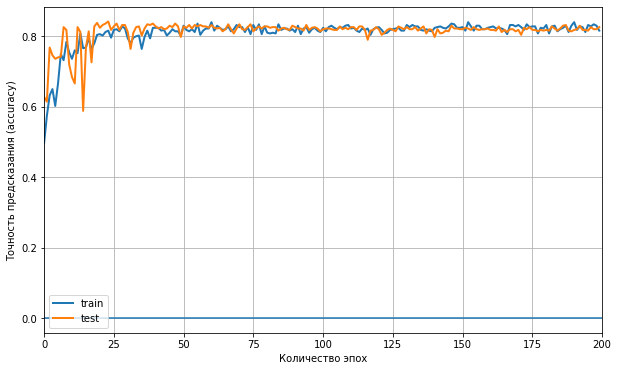

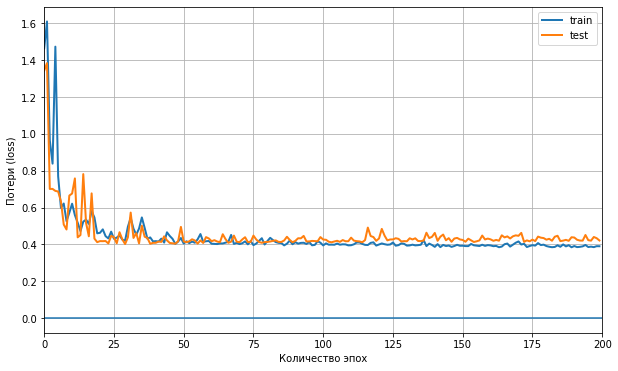

In [10]:
# Определение модели
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))

# Компиляция модели
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Подгонка (обучение) модели
start_time = time.time()
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=32)
print("\nВремя обучения = ", (time.time() - start_time), ' c')

# Оценка модели
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Вывод графика результата обучения
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['accuracy'], linewidth = 2, label='train')
plt.plot(history.history['val_accuracy'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel("Точность предсказания (accuracy)")
plt.legend()
plt.show()

#Потери
plt.figure(figsize = size_of_fig)
plt.hlines(0, 0, num_of_epochs)
plt.xlim(0, num_of_epochs)
plt.plot(history.history['loss'], linewidth = 2, label = 'train')  
plt.plot(history.history['val_loss'], linewidth = 2, label='test')
plt.grid()
plt.xlabel("Количество эпох")
plt.ylabel('Потери (loss)') 
plt.legend()
plt.show()

# Minibatch gradient descent, с различными вариациями размера пакета

Epoch 1/200
125/125 [==============================] - 1s 6ms/step - loss: 2.3426 - accuracy: 0.6200 - val_loss: 0.6155 - val_accuracy: 0.7560
Epoch 2/200
125/125 [==============================] - 1s 4ms/step - loss: 0.6186 - accuracy: 0.7540 - val_loss: 0.7361 - val_accuracy: 0.7320
Epoch 3/200
125/125 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.7560 - val_loss: 0.5651 - val_accuracy: 0.7680
Epoch 4/200
125/125 [==============================] - 1s 4ms/step - loss: 0.5668 - accuracy: 0.7720 - val_loss: 0.4504 - val_accuracy: 0.8260
Epoch 5/200
125/125 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7820 - val_loss: 0.4365 - val_accuracy: 0.8360
Epoch 6/200
125/125 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7840 - val_loss: 0.4795 - val_accuracy: 0.8040
Epoch 7/200
125/125 [==============================] - 1s 4ms/step - loss: 0.4867 - accuracy: 0.7900 - val_loss: 0.5528 - val_accuracy: 0.7820

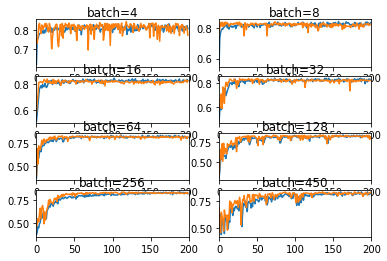

In [8]:
# Список размеров пакета для обучения
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

# Обучение модели и построение графиков
def fit_model(trainX, trainy, testX, testy, n_batch):
 # Определение модели
 model = Sequential()
 model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(3, activation='softmax'))

 # Компиляция модели
 opt = SGD(lr=0.01, momentum=0.9)
 model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

 # Подгонка (обучение) модели
 start_time = time.time()
 history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=num_of_epochs, verbose=1, batch_size=n_batch)
 print("\nВремя обучения = ", (time.time() - start_time), ' c')
 
 # plot learning curves
 plt.xlim(0, num_of_epochs)
 plt.plot(history.history['accuracy'], label='train')
 plt.plot(history.history['val_accuracy'], label='test')
 plt.title('batch='+str(n_batch), pad=-40)
 
for i in range(len(batch_sizes)):
 # determine the plot number
 plot_no = 420 + (i+1)
 plt.subplot(plot_no)
 
 # fit model and plot learning curves for a batch size
 fit_model(trainX, trainy, testX, testy, batch_sizes[i])

# show learning curves
plt.show()